# Split train test dataset

In [2]:
import os
import cv2
import time
import pathlib

import numpy as np
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import torch, torchvision
from torchsummary import summary
from torchvision import datasets, models, transforms

import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [3]:
# Define path dataset
ds_1a_path = './datasets/1a'
ds_1b_path = './datasets/1b'
ds_2a_path = './datasets/2a'
ds_2b_path = './datasets/2b'
ds_3_path = './datasets/3'

list_ds_1a_path = glob(f'{ds_1a_path}/*.jpg')
list_ds_1b_path = glob(f'{ds_1b_path}/*.jpg')
list_ds_2a_path = glob(f'{ds_2a_path}/*.jpg')
list_ds_2b_path = glob(f'{ds_2b_path}/*.jpg')
list_ds_3_path = glob(f'{ds_3_path}/*.jpg')

print(f'Count classes 1A : {len(list_ds_1a_path)}')
print(f'Count classes 1B : {len(list_ds_1b_path)}')
print(f'Count classes 2A : {len(list_ds_2a_path)}')
print(f'Count classes 2B : {len(list_ds_2b_path)}')
print(f'Count classes 3 : {len(list_ds_3_path)}')

Count classes 1A : 1045
Count classes 1B : 707
Count classes 2A : 115
Count classes 2B : 176
Count classes 3 : 862


In [4]:
# Split train and val

VAL_SPLIT = 0.2

train_1a_path, val_1a_path = train_test_split(list(list_ds_1a_path), test_size=VAL_SPLIT)
train_1b_path, val_1b_path = train_test_split(list(list_ds_1b_path), test_size=VAL_SPLIT)
train_2a_path, val_2a_path = train_test_split(list(list_ds_2a_path), test_size=VAL_SPLIT)
train_2b_path, val_2b_path = train_test_split(list(list_ds_2b_path), test_size=VAL_SPLIT)
train_3_path, val_3_path = train_test_split(list(list_ds_3_path), test_size=VAL_SPLIT)


train_list = [*train_1a_path, *train_1b_path, *train_2a_path, *train_2b_path, *train_3_path]
val_list = [*val_1a_path, *val_1b_path, *val_2a_path, *train_2b_path, *val_3_path]

In [5]:
# Copy File to folder train and val

DIR_TRAIN = './datasets/train'
DIR_VAL = './datasets/val'

print('Coppying train image')
for train_path in train_list:
    image_name, clases = train_path.split('/')[-1], train_path.split('/')[-2]
    #print(f'cp {train_path} {DIR_TRAIN}/{clases}/{image_name}')
    pathlib.Path(f'{DIR_TRAIN}/{clases}/').mkdir(parents=True, exist_ok=True)
    os.system(f'cp {train_path} {DIR_TRAIN}/{clases}/{image_name}')
    time.sleep(0.01)
print('Done copying train image to train path')

print('Coppying val image')
for val_path in val_list:
    image_name, clases = val_path.split('/')[-1], val_path.split('/')[-2]
    pathlib.Path(f'{DIR_VAL}/{clases}/').mkdir(parents=True, exist_ok=True)
    os.system(f'cp {val_path} {DIR_VAL}/{clases}/{image_name}')
    time.sleep(0.01)
print('Done copying validation image to val path')

Coppying train image


cp: target 'Truck_1653445096.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'Truck_1653444278.jpg' is not a directory
cp: target '1A_1654741853.jpg' is not a directory
cp: target 'Truck_1653444249.jpg' is not a directory
cp: target 'Truck_1653445207.jpg' is not a directory
cp: target 'Truck_1653445193.jpg' is not a directory
cp: target 'Truck_1653444451.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'Truck_1653443855.jpg' is not a directory
cp: target 'Truck_1653444000.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'Truck_1653443963.jpg' is not a directory
cp: target 'Truck_1653444547.jpg' is not a directory
cp: target 'Truck_1647322290.jpg' is not a directory
cp: target '1A_1654741871.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'Truck_1653444460.jpg' is not a directory
cp: target 'Truck_1653444590.jpg' is not a directory
cp: ta

Done copying train image to train path
Coppying val image


cp: target 'Truck_1653444096.jpg' is not a directory
cp: target 'Truck_1653444629.jpg' is not a directory
cp: target 'Truck_1653444339.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'Truck_1647391090.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'Truck_1647319318.jpg' is not a directory
cp: target 'Truck_1653444388.jpg' is not a directory
cp: target 'Truck_1647323162.jpg' is not a directory
cp: target 'Truck_1647322478.jpg' is not a directory
cp: target 'Truck_1647323087.jpg' is not a directory
cp: target 'copy.jpg' is not a directory
cp: target 'Truck_1653444256.jpg' is not a directory
cp: target 'Truck_1647320081.jpg' is not a directory
cp: target 'Truck_1647322848.jpg' is not a directory
cp: target 'Truck_1647319571.jpg' is not a directory


Done copying validation image to val path


In [6]:
# The actual normalization values haven't been calculated
# Train has 1750 images for each car
# Valid has 500 images for each car
# Test varies per car 
# The following transforms are used for data augmentation
# The actual values for rgb channel normalization haven't been calculated, genereic values have been taken.

image_transforms = { 
    'train': transforms.Compose([
        transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        transforms.RandomRotation(degrees=15),
        transforms.RandomHorizontalFlip(),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])
}


In [7]:
# Load Data from folders
data = {
    'train': datasets.ImageFolder(root=DIR_TRAIN, transform=image_transforms['train']),
    'valid': datasets.ImageFolder(root=DIR_VAL, transform=image_transforms['valid'])
}

# Get a mapping of the indices to the class names, in order to see the output classes of the test images.
idx_to_class = {v: k for k, v in data['train'].class_to_idx.items()}
print(idx_to_class)

# Size of Data, to be used for calculating Average Loss and Accuracy
train_data_size = len(data['train'])
valid_data_size = len(data['valid'])

print(f'Count Train : {train_data_size}')
print(f'Count Val : {valid_data_size}')

{0: '1a', 1: '1b', 2: '2a', 3: '2b', 4: '3'}
Count Train : 2265
Count Val : 671


In [8]:
# Create iterators for the Data loaded using DataLoader module
bs = 32

train_data_loader = DataLoader(data['train'], batch_size=bs, shuffle=True)
valid_data_loader = DataLoader(data['valid'], batch_size=bs, shuffle=True)


In [9]:
# Load pretrained ResNet50 Model
resnet34 = models.resnet34(pretrained=True)
#to make it GPU compatible
resnet34 = resnet34.to(device) 

In [10]:
# Freeze model parameters
for param in resnet34.parameters():
    param.requires_grad = False

In [11]:
# Change the final layer of ResNet50 Model for Transfer Learning
fc_inputs = resnet34.fc.in_features

resnet34.fc = nn.Sequential(
    nn.Linear(fc_inputs, 256),
    nn.ReLU(),
    nn.Dropout(0.4),
    nn.Linear(256, len(idx_to_class)), # Since 7 possible outputs
    nn.LogSoftmax(dim=1) # For using NLLLoss()
)

# Convert model to be used on GPU
resnet34 = resnet34.to(device)

In [12]:
# Define Optimizer and Loss Function
# The Adam optimizer is being used 
loss_func = nn.NLLLoss()
optimizer = optim.Adam(resnet34.parameters())

In [13]:
def train_and_validate(model, loss_criterion, optimizer, epochs=25):
    '''
    Function to train and validate
    Parameters
        :param model: Model to train and validate
        :param loss_criterion: Loss Criterion to minimize
        :param optimizer: Optimizer for computing gradients
        :param epochs: Number of epochs (default=25)

    Returns
        model: Trained Model with best validation accuracy
        history: (dict object): Having training loss, accuracy and validation loss, accuracy
    '''

    start = time.time()
    history = []
    best_acc = 0.0

    for epoch in range(epochs):
        epoch_start = time.time()
        print("Epoch: {}/{}".format(epoch+1, epochs))
        
        # Set to training mode
        model.train()
        
        # Loss and Accuracy within the epoch
        train_loss = 0.0
        train_acc = 0.0
        
        valid_loss = 0.0
        valid_acc = 0.0
        
        for i, (inputs, labels) in enumerate(train_data_loader):
            inputs = inputs.to(device)
            labels = labels.to(device)
            
            # Clean existing gradients
            optimizer.zero_grad()
            
            # Forward pass - compute outputs on input data using the model
            outputs = model(inputs)
            
            # Compute loss
            loss = loss_criterion(outputs, labels)
            
            # Backpropagate the gradients
            loss.backward()
            
            # Update the parameters
            optimizer.step()
            
            # Compute the total loss for the batch and add it to train_loss
            train_loss += loss.item() * inputs.size(0)
            
            # Compute the accuracy
            ret, predictions = torch.max(outputs.data, 1)
            correct_counts = predictions.eq(labels.data.view_as(predictions))
            
            # Convert correct_counts to float and then compute the mean
            acc = torch.mean(correct_counts.type(torch.FloatTensor))
            
            # Compute total accuracy in the whole batch and add to train_acc
            train_acc += acc.item() * inputs.size(0)
            
            #print("Batch number: {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}".format(i, loss.item(), acc.item()))

            
        # Validation - No gradient tracking needed
        with torch.no_grad():
            # Set to evaluation mode
            model.eval()

            # Validation loop
            for j, (inputs, labels) in enumerate(valid_data_loader):
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Forward pass - compute outputs on input data using the model
                outputs = model(inputs)

                # Compute loss
                loss = loss_criterion(outputs, labels)

                # Compute the total loss for the batch and add it to valid_loss
                valid_loss += loss.item() * inputs.size(0)

                # Calculate validation accuracy
                ret, predictions = torch.max(outputs.data, 1)
                correct_counts = predictions.eq(labels.data.view_as(predictions))

                # Convert correct_counts to float and then compute the mean
                acc = torch.mean(correct_counts.type(torch.FloatTensor))

                # Compute total accuracy in the whole batch and add to valid_acc
                valid_acc += acc.item() * inputs.size(0)

                #print("Validation Batch number: {:03d}, Validation: Loss: {:.4f}, Accuracy: {:.4f}".format(j, loss.item(), acc.item()))
            
        # Find average training loss and training accuracy
        avg_train_loss = train_loss/train_data_size 
        avg_train_acc = train_acc/train_data_size
            # Find average training loss and training accuracy
        avg_valid_loss = valid_loss/valid_data_size 
        avg_valid_acc = valid_acc/valid_data_size

        history.append([avg_train_loss, avg_valid_loss, avg_train_acc, avg_valid_acc])
                
        epoch_end = time.time()

        print("Epoch : {:03d}, Training: Loss: {:.4f}, Accuracy: {:.4f}%, \n\t\tValidation : Loss : {:.4f}, Accuracy: {:.4f}%, Time: {:.4f}s".format(epoch, avg_train_loss, avg_train_acc*100, avg_valid_loss, avg_valid_acc*100, epoch_end-epoch_start))
        
        # Save if the model has best accuracy till now
        torch.save(model, dataset+'_model_'+str(epoch)+'.pt')
            
    return model, history

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# Print the model to be trained
#summary(resnet50, input_size=(3, 224, 224), batch_size=bs, device='cuda')

# Train the model for 25 epochs
num_epochs = 500
dataset= 'models/v1/resnet34'
trained_model, history = train_and_validate(resnet34, loss_func, optimizer, num_epochs)

torch.save(history, dataset+'_history.pt')

Epoch: 1/500
Epoch : 000, Training: Loss: 0.8308, Accuracy: 68.6534%, 
		Validation : Loss : 0.4924, Accuracy: 85.0969%, Time: 116.7007s
Epoch: 2/500
Epoch : 001, Training: Loss: 0.5103, Accuracy: 81.5011%, 
		Validation : Loss : 0.4585, Accuracy: 83.4575%, Time: 45.5430s
Epoch: 3/500
Epoch : 002, Training: Loss: 0.4598, Accuracy: 83.2671%, 
		Validation : Loss : 0.4032, Accuracy: 85.6930%, Time: 46.7062s
Epoch: 4/500
Epoch : 003, Training: Loss: 0.3866, Accuracy: 86.4459%, 
		Validation : Loss : 0.2980, Accuracy: 90.1639%, Time: 42.0963s
Epoch: 5/500
Epoch : 004, Training: Loss: 0.3824, Accuracy: 85.8278%, 
		Validation : Loss : 0.3556, Accuracy: 87.3323%, Time: 42.8849s
Epoch: 6/500
Epoch : 005, Training: Loss: 0.3695, Accuracy: 87.1523%, 
		Validation : Loss : 0.2554, Accuracy: 91.5052%, Time: 41.4417s
Epoch: 7/500
Epoch : 006, Training: Loss: 0.3323, Accuracy: 87.2406%, 
		Validation : Loss : 0.2558, Accuracy: 90.9091%, Time: 45.3652s
Epoch: 8/500
Epoch : 007, Training: Loss: 0.334

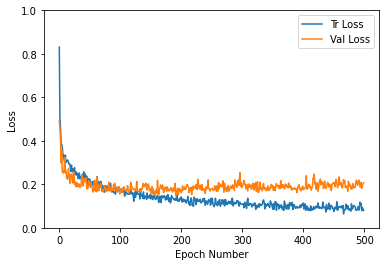

In [15]:
history = np.array(history)
plt.plot(history[:,0:2])
plt.legend(['Tr Loss', 'Val Loss'])
plt.xlabel('Epoch Number')
plt.ylabel('Loss')
plt.ylim(0,1)
plt.savefig(dataset+'_loss_curve.png')
plt.show()

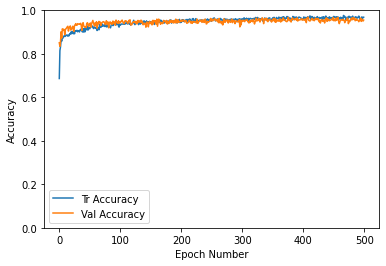

In [16]:
plt.plot(history[:,2:4])
plt.legend(['Tr Accuracy', 'Val Accuracy'])
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.ylim(0,1)
plt.savefig(dataset+'_accuracy_curve.png')
plt.show()

In [25]:
def predict(model, test_image_name):
    '''
    Function to predict the class of a single test image
    Parameters
        :param model: Model to test
        :param test_image_name: Test image

    '''
    
    transform = image_transforms['test']

    test_image = Image.open(test_image_name)
    plt.imshow(test_image)
    
    test_image_tensor = transform(test_image)

    if torch.cuda.is_available():
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224).cuda()
    else:
        test_image_tensor = test_image_tensor.view(1, 3, 224, 224)
    
    with torch.no_grad():
        model.eval()
        # Model outputs log probabilities
        out = model(test_image_tensor)
        ps = torch.exp(out)
        topk, topclass = ps.topk(5, dim=1) #len(clasess)
        for i in range(len(ps)):
             print("Classification GOL : ", idx_to_class[topclass.cpu().numpy()[0][i]], ", Score: ", topk.cpu().numpy()[0][i])

Classification GOL :  1a , Score:  1.0


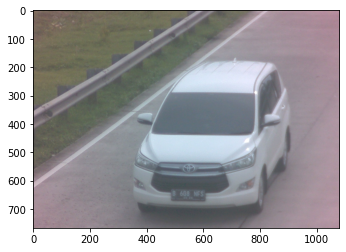

In [ ]:
model = torch.load('./models/v1/resnet34_model_499.pt')

predict(model, './images/_1654759047.jpg')

# Export ONNX model

In [32]:
# !pip install onnxruntime-gpu
!pip install onnx

     |████████████████████████████████| 12.8 MB 8.8 kB/s eta 0:00:01     |██████████████████████████▉     | 10.7 MB 1.5 MB/s eta 0:00:02


In [3]:
path_saved = './models/v1/onnx'


In [30]:
# export model to onnx 

torch.onnx.export(model.cuda(), torch.randn(1, 3, 224, 224, device='cuda'), f'{path_saved}/vehicle_classification_v1.onnx')

In [259]:
!export PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION='python' 

import cv2
import onnx
import onnxruntime
from onnx import numpy_helper

from torch import cuda, device
from torchvision import transforms

from PIL import Image

In [23]:
model_name = f'{path_saved}/vehicle_classification_v1.onnx'
onnx_model = onnx.load(model_name)
onnx.checker.check_model(onnx_model)

In [40]:

image = Image.open('./datasets/1b/_1652858821.jpg')
resize = transforms.Compose([
        transforms.Resize(size=256),
        transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
    ])             
image = resize(image)
image = image.unsqueeze(0) # add fake batch dimension
image = image.to('cuda:0')

EP_list = ['CUDAExecutionProvider', 'CPUExecutionProvider']

ort_session = onnxruntime.InferenceSession(model_name, providers=EP_list)

def to_numpy(tensor):
      return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()

# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: to_numpy(image)}
ort_outs = ort_session.run(None, ort_inputs)

max = float('-inf')
max_index = -1
for i in range(0, len(ort_outs[0][0])):       
   if(ort_outs[0][0][i] > max):    
       max = ort_outs[0][0][i]
       max_index = i
print(max_index)

1


2022-06-10 17:55:50.067833490 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:552 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/reference/execution-providers/CUDA-ExecutionProvider.html#requirements to ensure all dependencies are met.


In [257]:
class VehicleClassification:
    def __init__(self, model_path, clasess):
        self.model_path = model_path
        self.classes = clasess
        self.device = device("cuda:0" if cuda.is_available() else "cpu")
        self.EP_list = ['CUDAExecutionProvider', 'CPUExecutionProvider']
        self.transform_image = self.transfrom_img()
        self.ort_session = self.onnx_session()
        
    def onnx_session(self):
        return onnxruntime.InferenceSession(self.model_path, providers=self.EP_list)
        
    def transfrom_img(self):
        return transforms.Compose([
            transforms.Resize(size=256),
            transforms.CenterCrop(size=224),
            transforms.ToTensor(),
            transforms.Normalize(
                [0.485, 0.456, 0.406],
                [0.229, 0.224, 0.225])
            ])
    
    @classmethod
    def tensor_image_to_numpy(cls, tensor):
        return tensor.detach().cpu().numpy() if tensor.requires_grad else tensor.cpu().numpy()
    
    def image_processing(self, image):
        image = self.transform_image(image)
        image = image.unsqueeze(0)
        return image.to(self.device)

    def extract_output(self, ort_outs):
        idx = np.argmax([i for i in ort_outs[0][0]])
        conf = [round(100+int(i)) for i in ort_outs[0][0]]
        return self.classes[idx], conf[idx]
    
    def classification(self, image):
        if type(image) == np.ndarray:
            image = Image.fromarray(image)
            
        image = self.image_processing(image)
        ort_inputs = {self.ort_session.get_inputs()[0].name: self.tensor_image_to_numpy(image)}
        ort_outs = self.ort_session.run(None, ort_inputs)
        classe, conf = self.extract_output(ort_outs)
        return classe, conf

vehicle_classification = VehicleClassification(model_name, ['1a', '1b', '2a', '2b', '3'])



2022-06-10 22:43:57.437495212 [W:onnxruntime:Default, onnxruntime_pybind_state.cc:552 CreateExecutionProviderInstance] Failed to create CUDAExecutionProvider. Please reference https://onnxruntime.ai/docs/reference/execution-providers/CUDA-ExecutionProvider.html#requirements to ensure all dependencies are met.


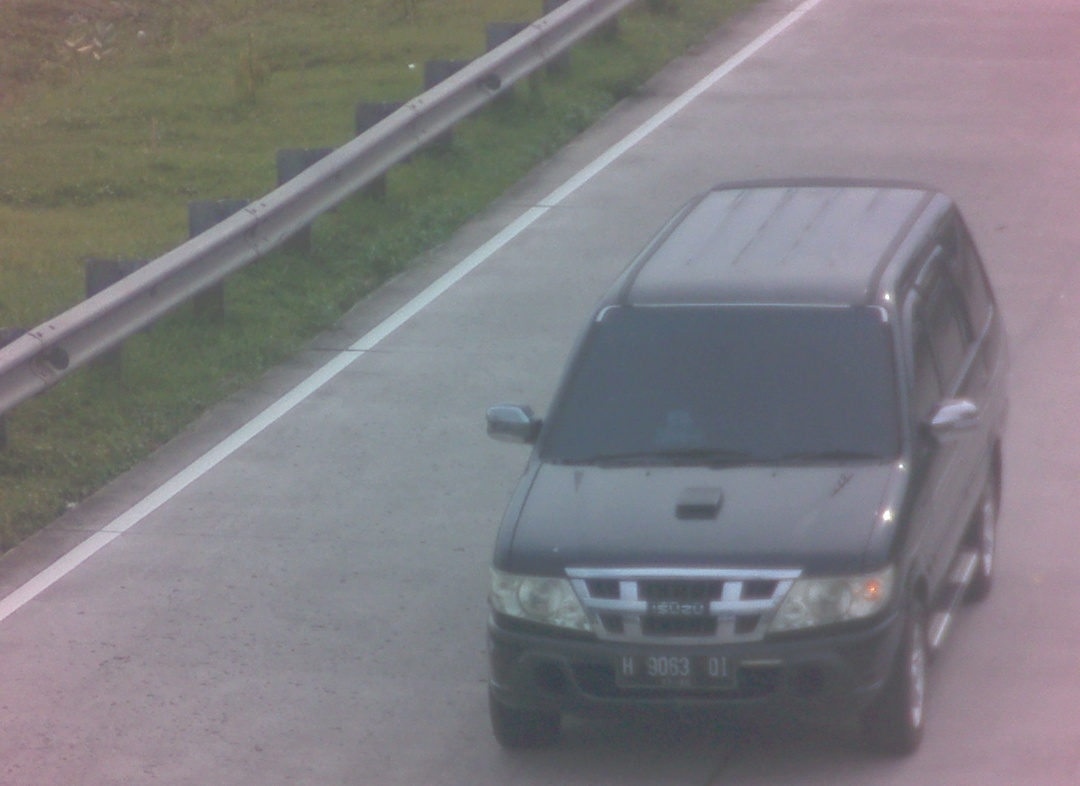

In [219]:
image = Image.open('./images/_1654759103.jpg')
output = vehicle_classification.classification(image)
image

In [203]:
max = float('-inf')
max_index = -1
for i in range(0, len(output[0][0])):
    if output[0][0][i] > max:
        max = output[0][0][i]
        max_index = i
    print((100+float(output[0][0][i]))/100)

print(max_index)

0.9918603664636612
0.9941463333368301
0.5384440994262696
0.7916206169128418
0.7498843002319336
1


In [260]:
from glob import glob

In [283]:
image_path = glob('./images/*.jpg')
outputs = list()
for i in image_path:
    image = cv2.imread(i)
    output = vehicle_classification.classification(image)
    outputs.append(output[0])
    print(output[1])

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100


In [281]:
len(image_path)

20

In [115]:
import numpy as np
import matplotlib.pyplot as plt

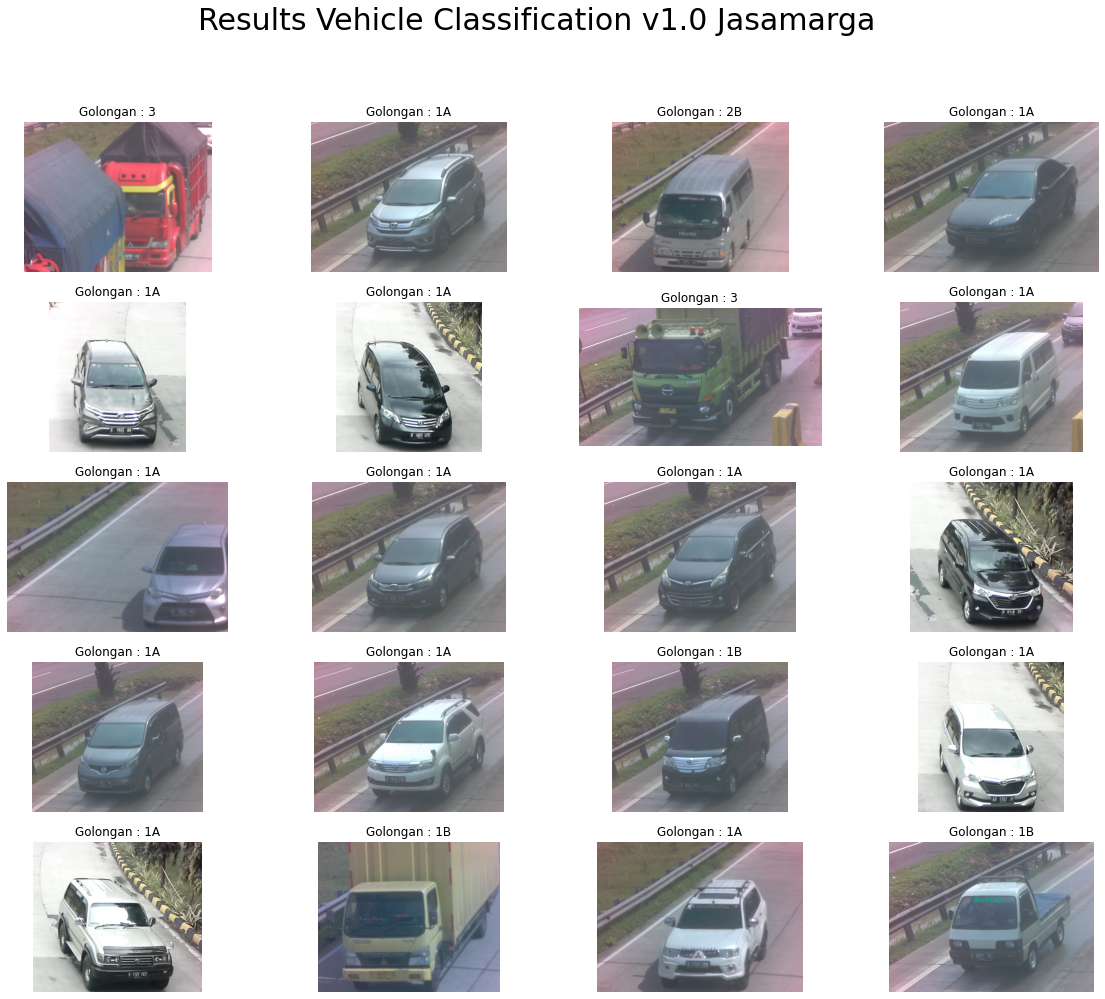

In [285]:
fig = plt.figure(figsize=(20, 16))
fig.suptitle('Results Vehicle Classification v1.0 Jasamarga', fontsize=30)
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = Image.open(image_path[i-1])
    fig.add_subplot(rows, columns, i)
    plt.axis('off')
    plt.imshow(img)
    plt.title(f'Golongan : {outputs[i-1].upper()}')
plt.show()
fig.savefig('results.jpg', dpi=fig.dpi, bbox_inches='tight', pad_inches=0.5)

In [289]:
import sys

sys.getsizeof(99)


28

In [290]:
!pip show onnx

Name: onnx
Version: 1.10.1
Summary: Open Neural Network Exchange
Home-page: https://github.com/onnx/onnx
Author: ONNX
Author-email: onnx-technical-discuss@lists.lfai.foundation
License: Apache License v2.0
Location: /media/ali/5A4E77384E770BCF/ALI_MUSTOFA/HALOTEC/SOURCE_CODE/JASAMARGA/Vehicle-Classification/env/lib/python3.8/site-packages
Requires: protobuf, typing-extensions, six, numpy
Required-by: 


In [294]:
!pip list

Package              Version     
-------------------- ------------
-rotobuf             4.21.1      
anyio                3.6.1       
argon2-cffi          21.3.0      
argon2-cffi-bindings 21.2.0      
asttokens            2.0.5       
attrs                21.4.0      
Babel                2.10.1      
backcall             0.2.0       
beautifulsoup4       4.11.1      
bleach               5.0.0       
certifi              2022.5.18.1 
cffi                 1.15.0      
charset-normalizer   2.0.12      
cycler               0.11.0      
debugpy              1.6.0       
decorator            5.1.1       
defusedxml           0.7.1       
entrypoints          0.4         
executing            0.8.3       
fastjsonschema       2.15.3      
flatbuffers          2.0         
fonttools            4.33.3      
idna                 3.3         
importlib-metadata   4.11.4      
importlib-resources  5.7.1       
ipykernel            6.13.1      
ipython              8.4.0       
ipython-genuti

In [292]:
!pip show protobuf

Name: protobuf
Version: 3.19.4
Summary: Protocol Buffers
Home-page: https://developers.google.com/protocol-buffers/
Author: None
Author-email: None
License: 3-Clause BSD License
Location: /media/ali/5A4E77384E770BCF/ALI_MUSTOFA/HALOTEC/SOURCE_CODE/JASAMARGA/Vehicle-Classification/env/lib/python3.8/site-packages
Requires: 
Required-by: onnxruntime-gpu, onnx
